# Import

In [1]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# Gaussian Mixture Model

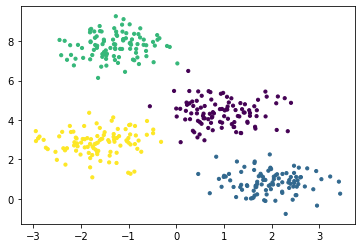

In [2]:
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

# use GaussianMixture from sklearn.mixture library and fit it on X. Set the number of clusters 2. After that plot the 
# scatter after clustering.
gm = GaussianMixture(n_components=4)
labels = gm.fit(X).predict(X)

plt.scatter(X[:, 0], X[:, 1], s=10 ,c=labels, cmap='viridis')

# Plot Gaussian Contours

In [3]:
# these functions plot both the scatter and the contours of the gaussian distributions of the clusters
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig*width, nsig*height, angle, **kwargs))


def plot_gmm(gmm, X, ax=None):
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis', zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w*w_factor)


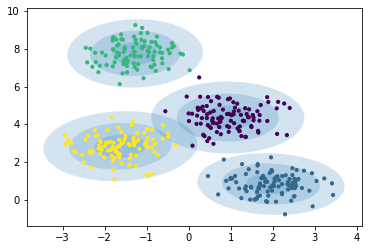

In [4]:
plot_gmm(gm, X)

# Anaother Data

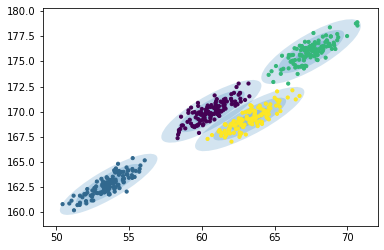

In [5]:
# read the data saved in 'data2.csv' file and save it into a numpy array called 'data2'. use GaussianMixture from 
# sklearn.mixture library and fit it on data2. Set the number of clusters 4. Plot the scatter and Gaussian distribution 
# contours after clustering. 

df2 = pd.read_csv('data2.csv')
data2 = df2.to_numpy()

gm = GaussianMixture(n_components=4)
labels = gm.fit(data2).predict(data2)

plot_gmm(gm, data2)


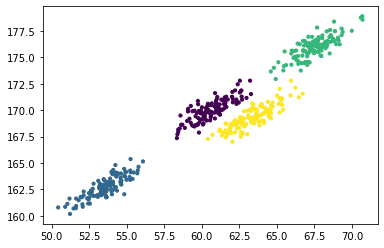

In [6]:
# Read the GaussianMixture and find other values of covariance_type and try them.

#gm = GaussianMixture(n_components=4,covariance_type="full")
gm = GaussianMixture(n_components=4,covariance_type="tied")
labels = gm.fit(data2).predict(data2)

#plot_gmm(gm, data2)
plt.scatter(data2[:, 0], data2[:, 1], s=10 ,c=labels, cmap='viridis')

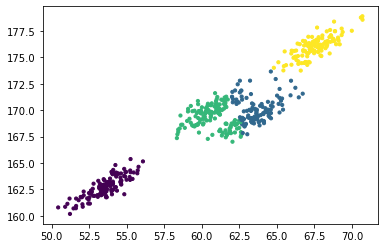

In [7]:
# Read the GaussianMixture and find other values of covariance_type and try them.

gm = GaussianMixture(n_components=4,covariance_type="diag")
labels = gm.fit(data2).predict(data2)

#plot_gmm(gm, data2)
plt.scatter(data2[:, 0], data2[:, 1], s=10 ,c=labels, cmap='viridis')

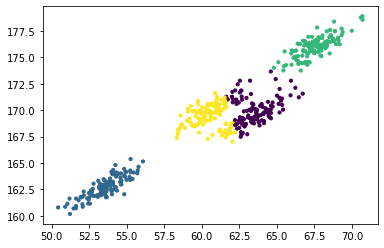

In [8]:
# Read the GaussianMixture and find other values of covariance_type and try them.

gm = GaussianMixture(n_components=4,covariance_type="spherical")
labels = gm.fit(data2).predict(data2)

#plot_gmm(gm, data2)
plt.scatter(data2[:, 0], data2[:, 1], s=10 ,c=labels, cmap='viridis')

# Different ks

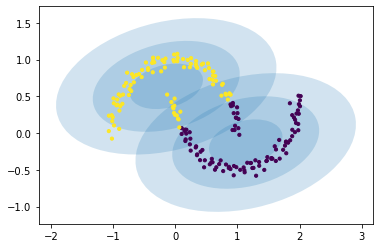

In [12]:
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)

# use GaussianMixture from sklearn.mixture library and fit it on data2. Set the number of clusters 2. Plot the scatter and Gaussian distribution 
# contours after clustering.
gm = GaussianMixture(n_components=2)
labels = gm.fit(Xmoon).predict(Xmoon)

plot_gmm(gm , Xmoon)

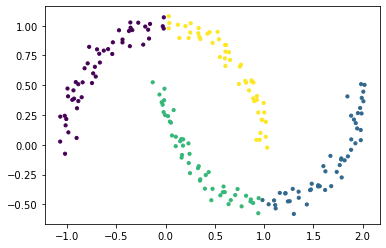

In [13]:
# can you find a k that fits beeter on this specific data. How reducing and increasing the number of clusters may affect
# the clustering? Try it with a larger k
gm = GaussianMixture(n_components=4)
labels = gm.fit(Xmoon).predict(Xmoon)

plt.scatter(Xmoon[:, 0], Xmoon[:, 1], s=10 ,c=labels, cmap='viridis')


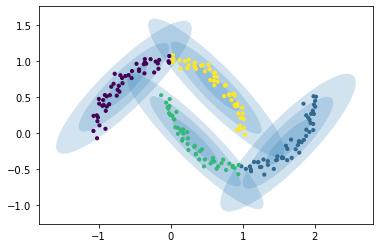

In [14]:
# Plot the scatter and Gaussian distribution contours both fo rthe above model.
plot_gmm(gm , Xmoon)